<a href="https://colab.research.google.com/github/AmiraBelkis/PFE-TEST/blob/optimize-WT/Cifar-10/AG_GoogLeNet_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rssrc

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Aug 11 14:53:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Lib

In [2]:
import random
import string
import torch
from torch import nn
import torch.nn.utils.prune as prune
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import matplotlib.colors as colors
import numpy as np
from copy import deepcopy

In [3]:
import AG

100%|██████████| 170498071/170498071 [00:02<00:00, 63832005.14it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
import importlib
import global_param
importlib.reload(global_param)
importlib.reload(AG)

Files already downloaded and verified
Files already downloaded and verified


<module 'AG' from '/content/AG.py'>

# AG

In [ ]:
model_path = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/Models/Cifar-10/googlenet_cifar_10'
model_base = torch.load(model_path)

In [ ]:
AG.evaluation_2(model_base , nn.CrossEntropyLoss())

Accuracy: 76.79%
Loss: 0.7533


(0.7679, 0.7533062635713322)

## AG method

In [ ]:
save_to = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/Cifar-10/GoogLeNet/'
os.makedirs(save_to, exist_ok=True)
os.makedirs(save_to +'children/', exist_ok=True)
os.makedirs(save_to +'parents/', exist_ok=True)
os.makedirs(save_to +'kd/', exist_ok=True)
os.makedirs(save_to +'kd/training/', exist_ok=True)

Generating the initial population :
     - individual 0 ----------- 100%
     - individual 1 ----------- 100%
     - individual 2 ----------- 100%
     - individual 3 ----------- 100%
     - individual 4 ----------- 100%
     - individual 5 ----------- 100%
     - individual 6 ----------- 100%
     - individual 7 ----------- 100%
Performing KD on the initial population :
------------------------------ Training 1 ---------------------------------
Epoch 0/4
----------
train Loss: 0.8280 Acc: 0.2561
val Loss: 0.7020 Acc: 0.3724

Epoch 1/4
----------
train Loss: 0.6735 Acc: 0.4238
val Loss: 0.6395 Acc: 0.4663

Epoch 2/4
----------
train Loss: 0.6129 Acc: 0.5047
val Loss: 0.6278 Acc: 0.4858

Epoch 3/4
----------
train Loss: 0.5822 Acc: 0.5412
val Loss: 0.5367 Acc: 0.5794

Epoch 4/4
----------
train Loss: 0.5598 Acc: 0.5666
val Loss: 0.5202 Acc: 0.6026

Training complete in 27m 34s
Best val Acc: 0.602600
------------------------------ Training 2 ---------------------------------
Epoch 0/4
--

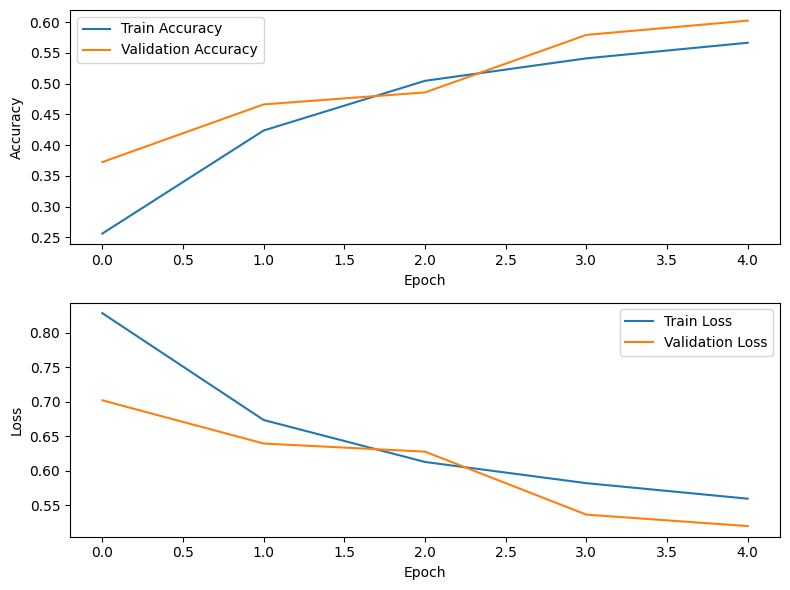

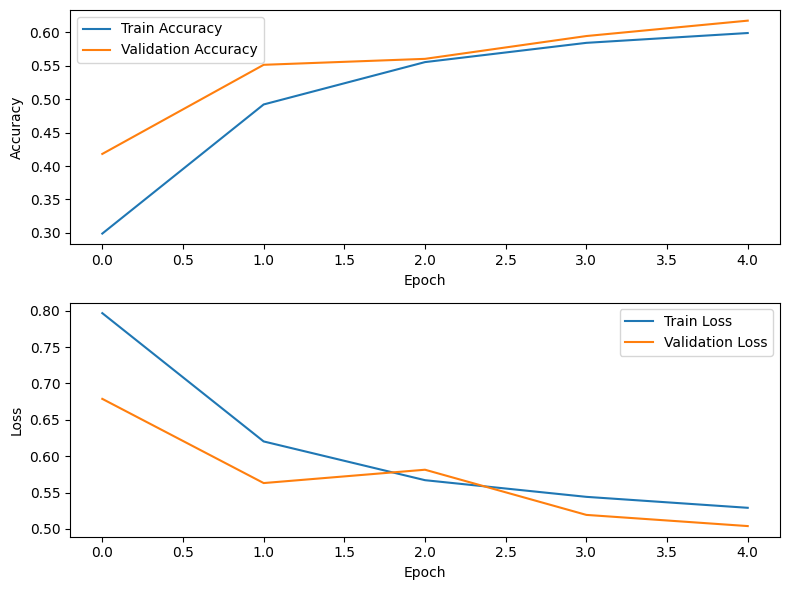

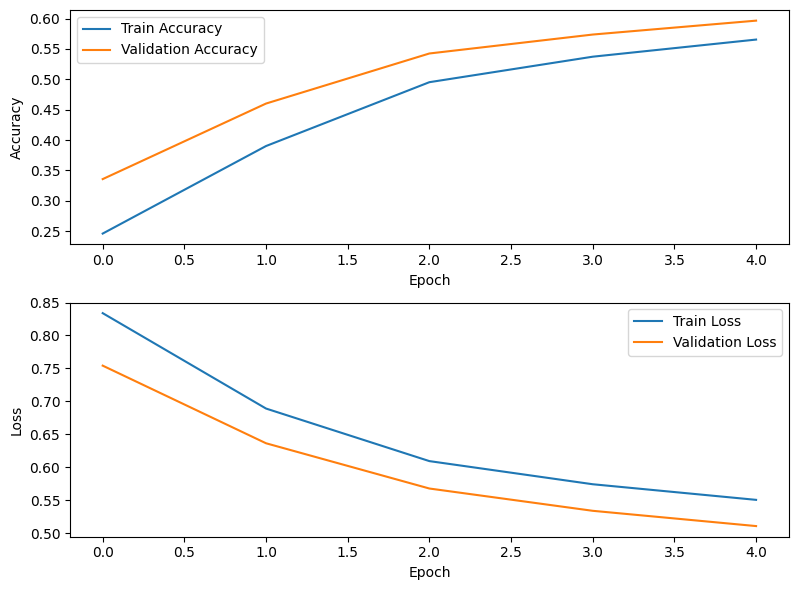

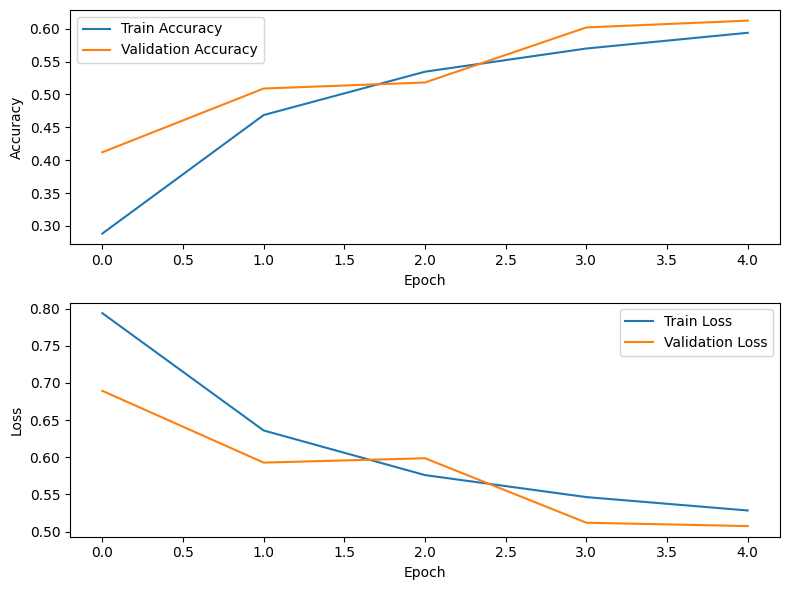

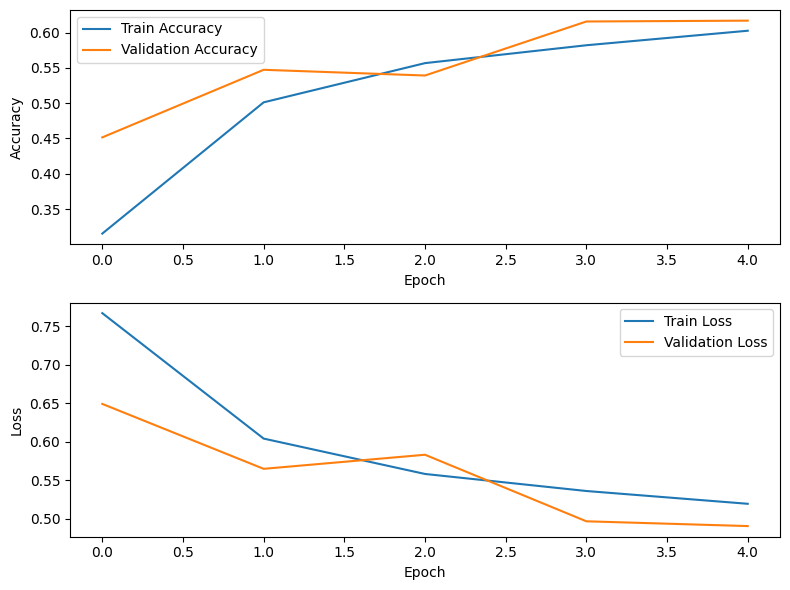

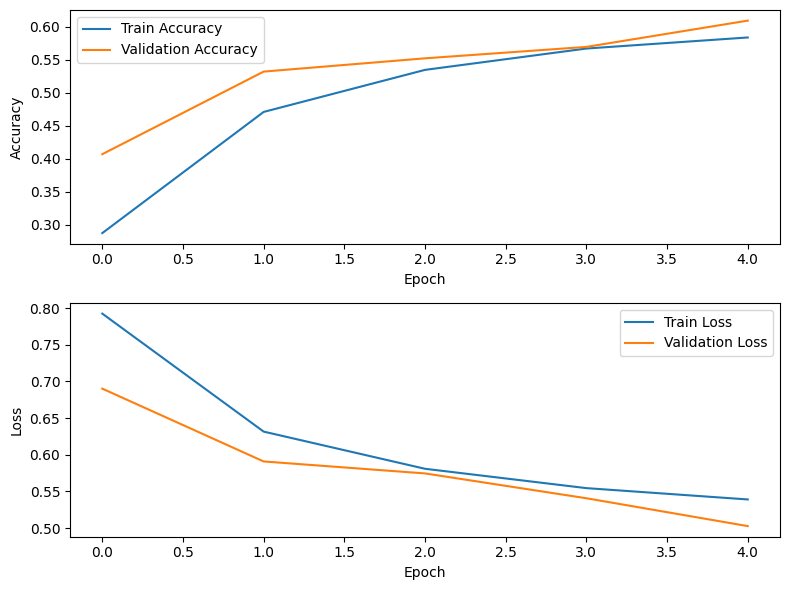

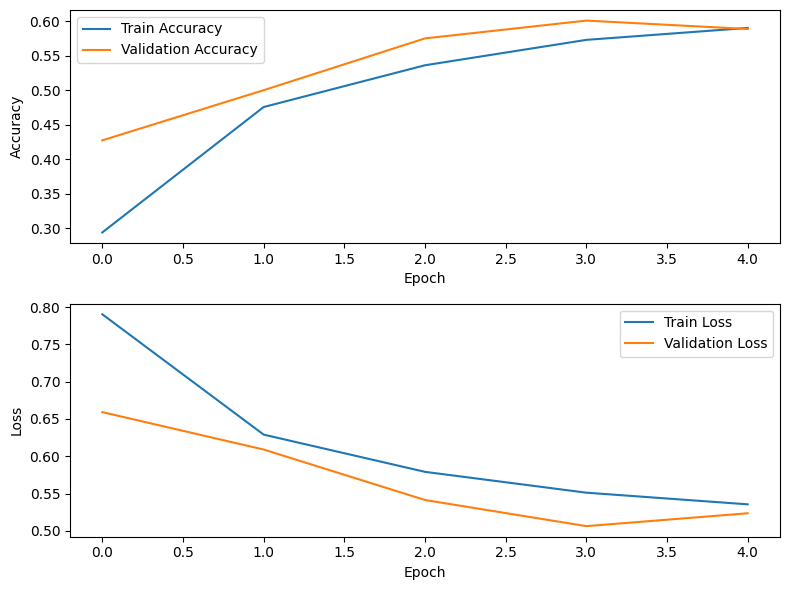

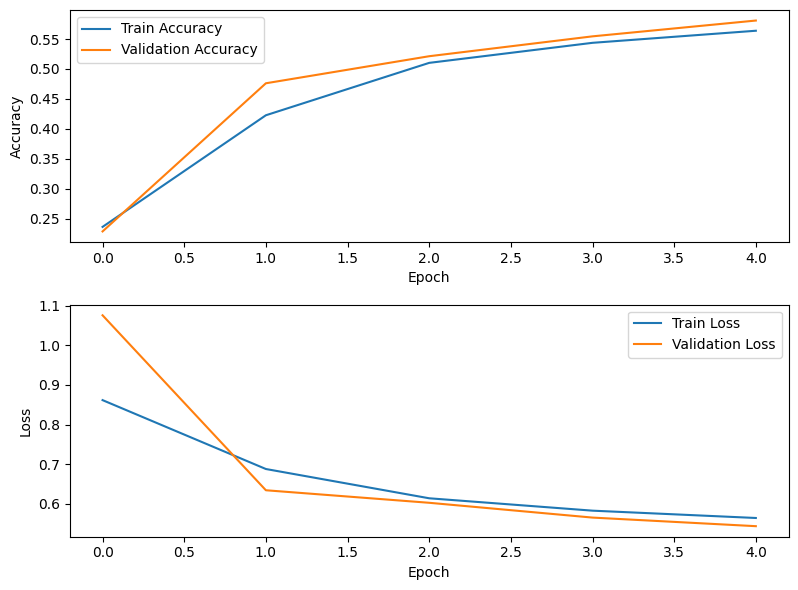

/*-----------------------------*/
/*         iteration 1        */
/*----------------------------*/
   * Select parent for crossing:
       - Selection --------------- 100%
   * Offspring:
       - Crossover:
           mask : [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1]
       - Crossover:
           mask : [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1]
       - Performing KD on the children :
--

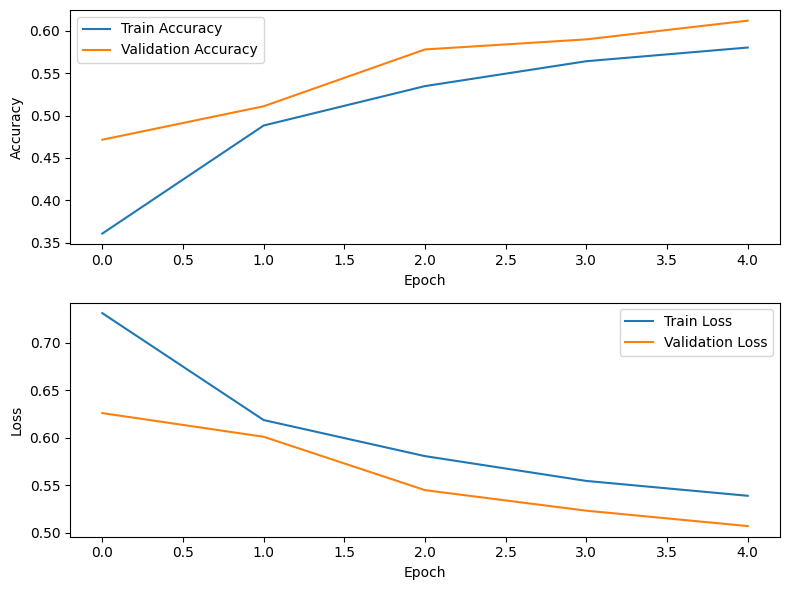

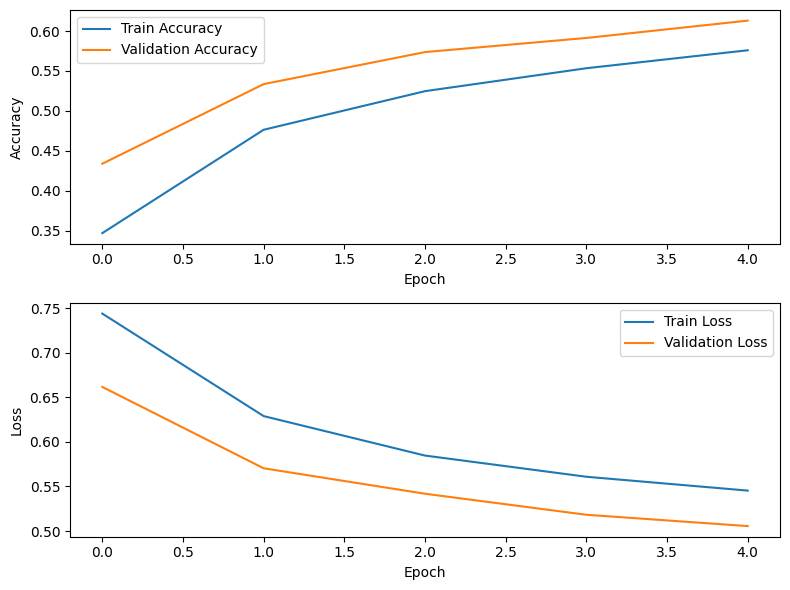

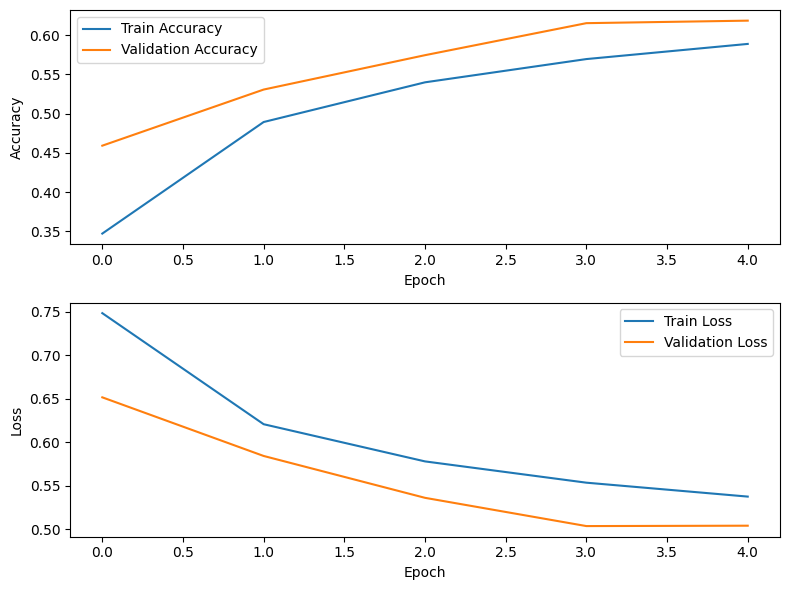

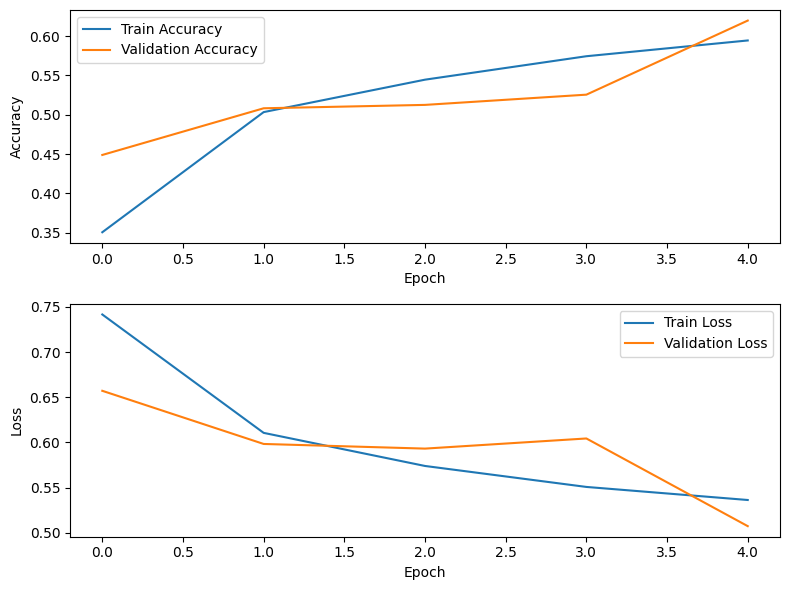

/*-----------------------------*/
/*         iteration 2        */
/*----------------------------*/
   * Select parent for crossing:
       - Selection --------------- 100%
   * Offspring:
       - Crossover:
           mask : [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]
       - mutation:
       - Crossover:
           mask : [0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]
       - Performing KD o

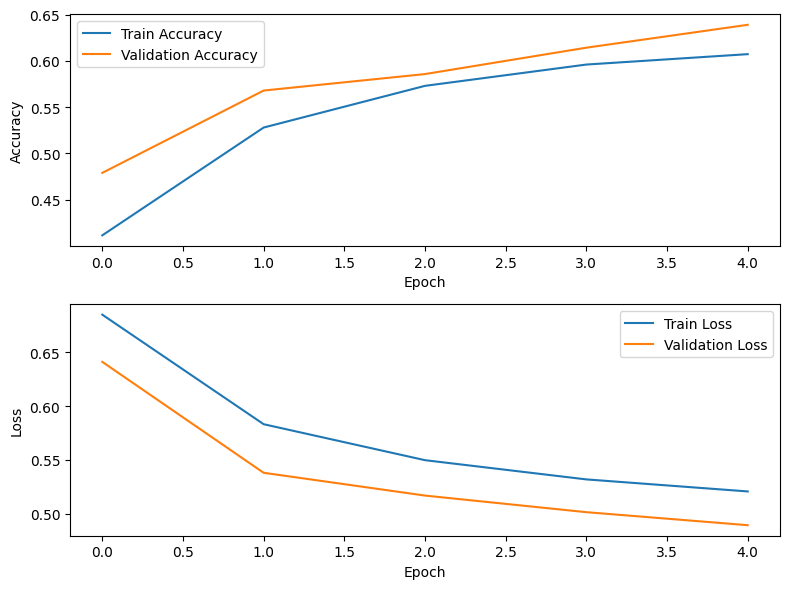

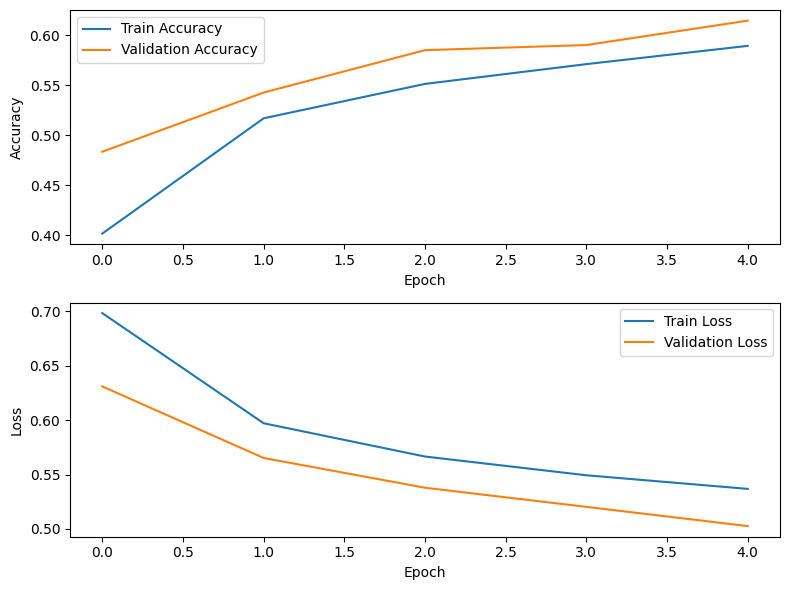

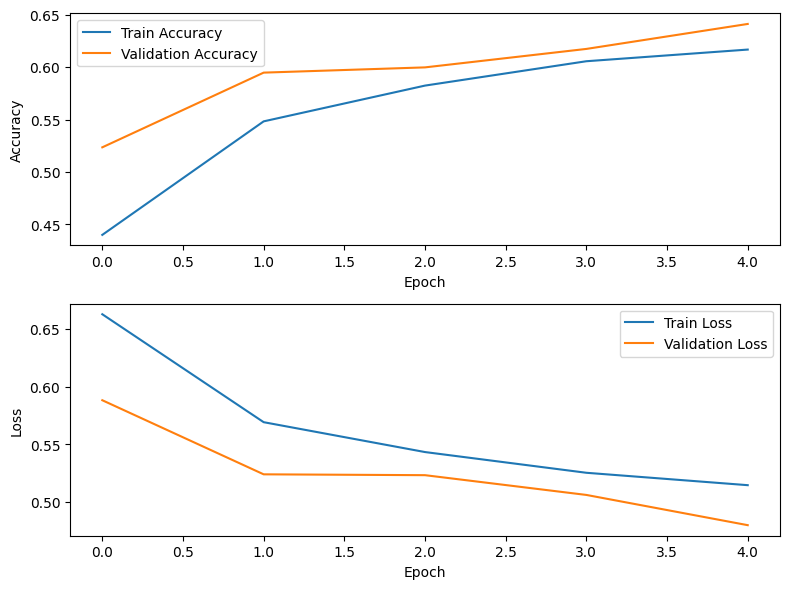

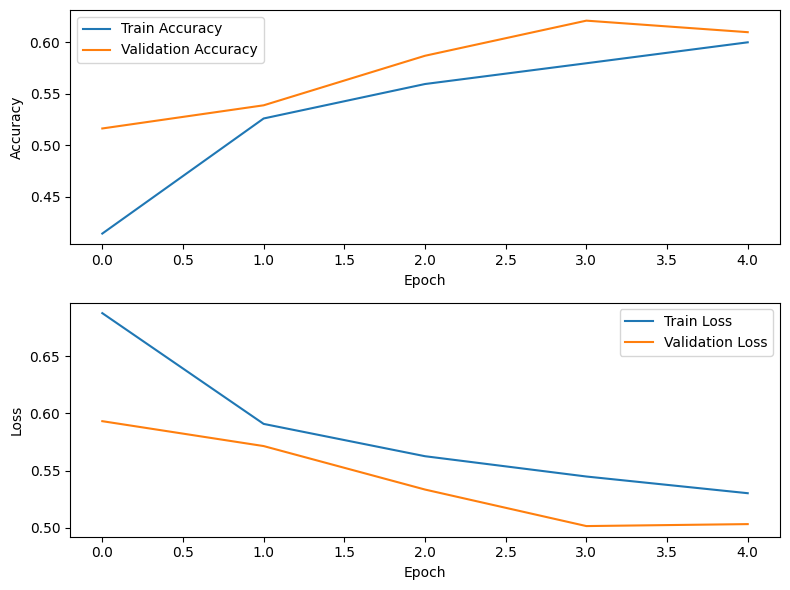

Select the winning ticket from final population
  - Selection --------------- 100%


In [ ]:
winning_ticket = AG.AG_method(model_base, save_to, nb_itr = 2, N = 8 ,pruning_rate = 0.85, pruning_space = 0.05,kd_epoch = 5)

## Evaluate the winning ticket

In [ ]:
winning_ticket = torch.load( save_to + 'winning_ticket')

In [ ]:
AG.calculate_sparsity(winning_ticket)

tensor(0.8534, device='cuda:0')

In [ ]:
AG.evaluation_2(winning_ticket, nn.CrossEntropyLoss())

Accuracy: 64.11%
Loss: 1.0636


(0.6411, 1.063612671414758)

In [ ]:
data = AG.dataloaders['val']
for in_ , lbl in data:
  in_ = in_.to(AG.device)
  lbl = lbl.to(AG.device)
  out = winning_ticket(in_)
  _, preds = torch.max(out, 1)
  print(preds)
  print('-'*10)
  print(lbl)
  print('-'*10)
  print(preds-lbl)
  break

tensor([4, 0, 8, 8, 7, 6, 9, 5, 9, 2, 9, 2, 5, 8, 8, 8, 5, 6, 1, 4, 7, 7, 1, 5,
        3, 6, 8, 0, 9, 1, 6, 3, 3, 9, 1, 5, 9, 0, 3, 4, 4, 0, 5, 2, 1, 9, 2, 5,
        9, 8, 8, 7, 8, 3, 5, 9, 3, 1, 2, 9, 1, 4, 4, 3], device='cuda:0')
----------
tensor([4, 0, 8, 8, 7, 6, 0, 3, 9, 2, 3, 2, 5, 0, 8, 8, 5, 6, 1, 4, 5, 7, 1, 5,
        4, 2, 2, 2, 1, 2, 6, 3, 2, 9, 1, 5, 1, 2, 3, 7, 4, 0, 5, 4, 0, 9, 2, 5,
        9, 8, 8, 7, 8, 2, 5, 9, 0, 1, 2, 0, 1, 4, 6, 7], device='cuda:0')
----------
tensor([ 0,  0,  0,  0,  0,  0,  9,  2,  0,  0,  6,  0,  0,  8,  0,  0,  0,  0,
         0,  0,  2,  0,  0,  0, -1,  4,  6, -2,  8, -1,  0,  0,  1,  0,  0,  0,
         8, -2,  0, -3,  0,  0,  0, -2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  3,  0,  0,  9,  0,  0, -2, -4], device='cuda:0')


## Fine tune the base model and perform KD for extra iterations

### Fine-tuning

In [5]:
model_path = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/Models/Cifar-10/googlenet_cifar_10'
model_base = torch.load(model_path)

In [ ]:
from global_param import *

def train_model(model, criterion, optimizer, scheduler , num_epochs=7):
    since = time.time()
    model = model.to(device)
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    statics = []
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            statics.append(
                {'epoch': epoch+1, 'phase': phase, 'acc': epoch_acc, 'loss': epoch_loss}
            )
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, statics

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer_conv  =  optim.SGD(model_base.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=5, gamma=0.1)
model_base , statics = train_model(model_base, criterion , optimizer_conv , exp_lr_scheduler , 5)

Epoch 0/4
----------
train Loss: 0.3551 Acc: 0.8833
val Loss: 0.2273 Acc: 0.9243

Epoch 1/4
----------
train Loss: 0.1844 Acc: 0.9396
val Loss: 0.1822 Acc: 0.9386

Epoch 2/4
----------
train Loss: 0.1242 Acc: 0.9607
val Loss: 0.1629 Acc: 0.9437

Epoch 3/4
----------
train Loss: 0.0833 Acc: 0.9739
val Loss: 0.1652 Acc: 0.9434

Epoch 4/4
----------
train Loss: 0.0581 Acc: 0.9835
val Loss: 0.1587 Acc: 0.9480

Training complete in 24m 34s
Best val Acc: 0.948000


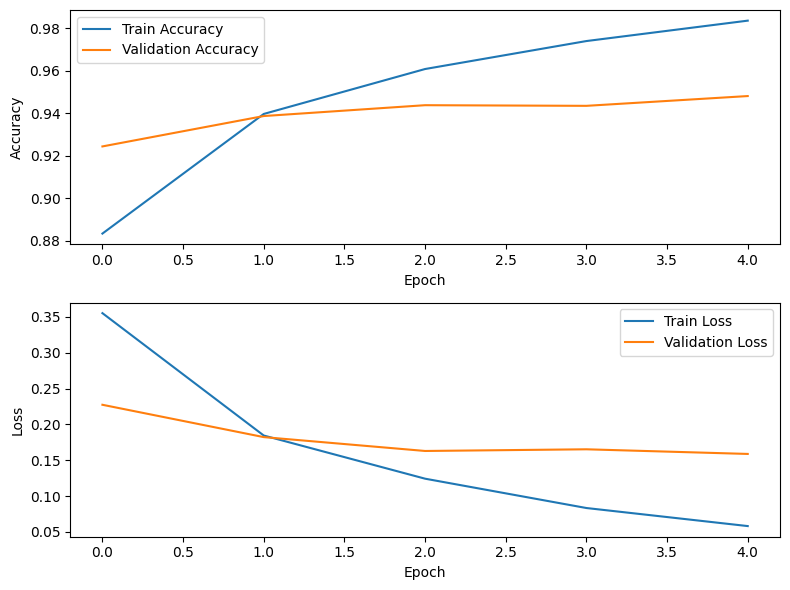

In [ ]:
AG.show_statics_training(statics, save_to + 'base model fine tuning for extra itr')
torch.save(model_base, model_path)

In [ ]:
AG.evaluation_2(model_base , nn.CrossEntropyLoss())

Accuracy: 94.80%
Loss: 0.1590


(0.948, 0.15903480103014)

### Perform KD for extra epochs

In [13]:
save_to = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/Cifar-10/GoogLeNet/'
winning_ticket = torch.load( save_to + 'winning_ticket')

------------------------------ Training ---------------------------------
Epoch 0/14
----------
train Loss: 1.1253 Acc: 0.6667
val Loss: 1.0132 Acc: 0.6785

Epoch 1/14
----------
train Loss: 1.0569 Acc: 0.6797
val Loss: 0.9635 Acc: 0.7015

Epoch 2/14
----------
train Loss: 1.0295 Acc: 0.6876
val Loss: 0.9669 Acc: 0.7028

Epoch 3/14
----------
train Loss: 1.0126 Acc: 0.6952
val Loss: 1.0014 Acc: 0.6865

Epoch 4/14
----------
train Loss: 0.9989 Acc: 0.7037
val Loss: 0.9241 Acc: 0.7186

Epoch 5/14
----------
train Loss: 0.9842 Acc: 0.7095
val Loss: 0.9178 Acc: 0.7216

Epoch 6/14
----------
train Loss: 0.9747 Acc: 0.7147
val Loss: 0.9278 Acc: 0.7181

Epoch 7/14
----------
train Loss: 0.9673 Acc: 0.7202
val Loss: 0.9335 Acc: 0.7176

Epoch 8/14
----------
train Loss: 0.9589 Acc: 0.7245
val Loss: 0.8962 Acc: 0.7344

Epoch 9/14
----------
train Loss: 0.9318 Acc: 0.7386
val Loss: 0.8829 Acc: 0.7441

Epoch 10/14
----------
train Loss: 0.9259 Acc: 0.7412
val Loss: 0.8952 Acc: 0.7401

Epoch 11/14


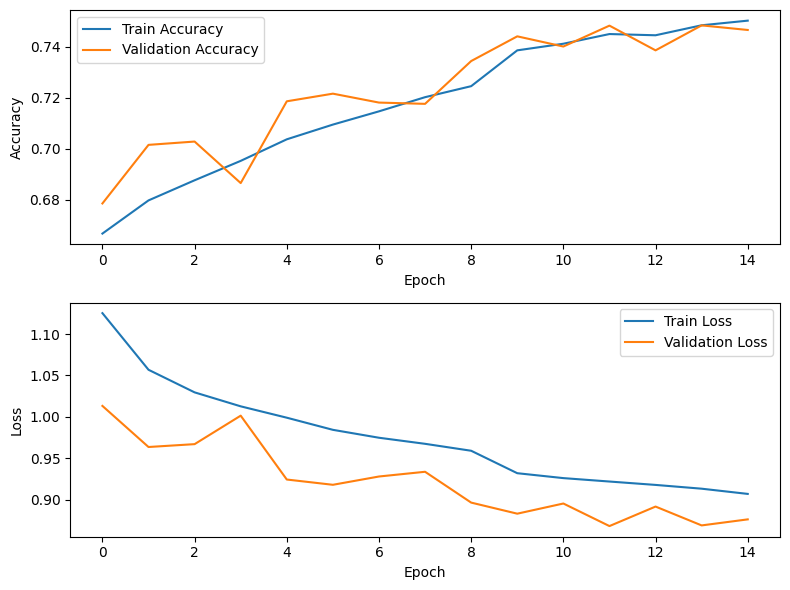

In [9]:
criterion = AG.SoftHardTargetLoss(global_param.soft_citerion,global_param.hard_citerion, global_param.soft_purcntg, global_param.hard_purcntg)

optimizer_conv =  optim.SGD(winning_ticket.parameters(), lr=0.01, momentum=0.9)

exp_lr_scheduler =  lr_scheduler.StepLR(optimizer_conv, step_size=9, gamma=0.5)

print("------------------------------ Training ---------------------------------")
# Train the model
winning_ticket, statics = AG.train_model_kd_mix(winning_ticket,model_base, criterion, optimizer_conv,exp_lr_scheduler, num_epochs=15)
AG.show_statics_training(statics, save_to + 'winning_ticket')
torch.save(winning_ticket, save_to + 'winning_ticket')

In [10]:
AG.evaluation_2(winning_ticket, nn.CrossEntropyLoss())

Accuracy: 74.84%
Loss: 0.7925


(0.7484, 0.792536323237571)

------------------------------ Training ---------------------------------
Epoch 0/14
----------
train Loss: 0.8944 Acc: 0.7573
val Loss: 0.8552 Acc: 0.7566

Epoch 1/14
----------
train Loss: 0.8890 Acc: 0.7619
val Loss: 0.8513 Acc: 0.7604

Epoch 2/14
----------
train Loss: 0.8907 Acc: 0.7613
val Loss: 0.8526 Acc: 0.7598

Epoch 3/14
----------
train Loss: 0.8865 Acc: 0.7627
val Loss: 0.8511 Acc: 0.7603

Epoch 4/14
----------
train Loss: 0.8859 Acc: 0.7627
val Loss: 0.8561 Acc: 0.7583

Epoch 5/14
----------
train Loss: 0.8878 Acc: 0.7594
val Loss: 0.8549 Acc: 0.7606

Epoch 6/14
----------
train Loss: 0.8848 Acc: 0.7624
val Loss: 0.8508 Acc: 0.7610

Epoch 7/14
----------
train Loss: 0.8818 Acc: 0.7648
val Loss: 0.8491 Acc: 0.7620

Epoch 8/14
----------
train Loss: 0.8825 Acc: 0.7660
val Loss: 0.8561 Acc: 0.7615

Epoch 9/14
----------
train Loss: 0.8832 Acc: 0.7660
val Loss: 0.8512 Acc: 0.7625

Epoch 10/14
----------
train Loss: 0.8831 Acc: 0.7642
val Loss: 0.8490 Acc: 0.7618

Epoch 11/14


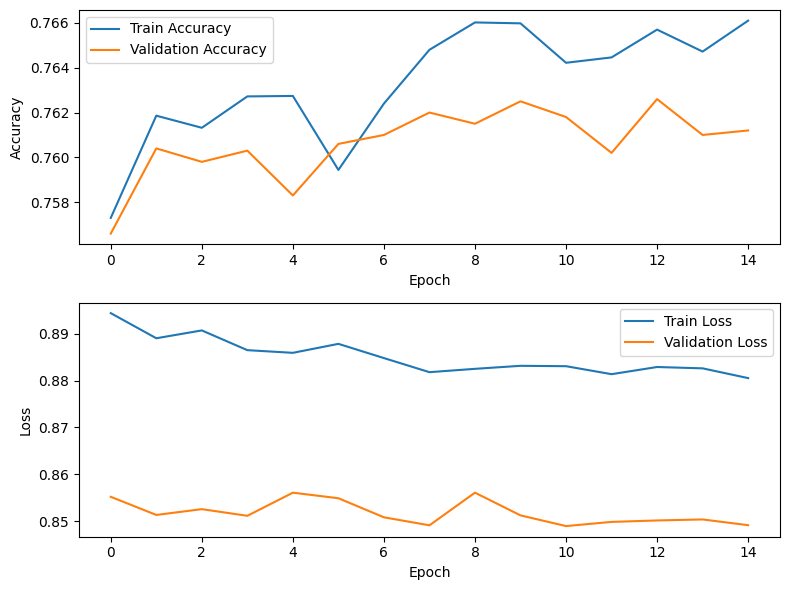

In [14]:
criterion = AG.SoftHardTargetLoss(global_param.soft_citerion,global_param.hard_citerion, global_param.soft_purcntg, global_param.hard_purcntg)

optimizer_conv =  optim.SGD(winning_ticket.parameters(), lr=0.0005, momentum=0.9)

exp_lr_scheduler =  lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.2)

print("------------------------------ Training ---------------------------------")
# Train the model
winning_ticket, statics = AG.train_model_kd_mix(winning_ticket,model_base, criterion, optimizer_conv,exp_lr_scheduler, num_epochs=15)
AG.show_statics_training(statics, save_to + 'winning_ticket 2')

In [15]:
torch.save(winning_ticket, save_to + 'winning_ticket')
AG.evaluation_2(winning_ticket, nn.CrossEntropyLoss())

Accuracy: 76.26%
Loss: 0.7674


(0.7626, 0.7674124379446552)